<a href="https://colab.research.google.com/github/WelfLowe/RLAgents/blob/main/Simple_Reinforcement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [12]:
!pip install gym

In [13]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Initialize the environment

In [14]:
env = gym.make("CartPole-v1")

# Hyperparameters

In [37]:
alpha = 0.1       # Learning rate
gamma = 0.99      # Discount factor
epsilon = 1.0     # Exploration rate
epsilon_decay = 0.9995
epsilon_min = 0.01
episodes = 10000    # Number of episodes


# Discretize the observation space

In [38]:
bins = [10, 10, 10, 10]  # Number of bins for discretization
obs_space_high = env.observation_space.high
obs_space_low = env.observation_space.low
obs_space_high[1] = 0.5  # Limit cart velocity
obs_space_low[1] = -0.5
obs_space_high[3] = 50   # Limit pole velocity
obs_space_low[3] = -50
obs_space = [np.linspace(low, high, b) for low, high, b in zip(obs_space_low, obs_space_high, bins)]

# Train

In [39]:
def discretize(state):
    """Converts continuous state into a discrete index."""
    return tuple(np.digitize(state[i], obs_space[i]) - 1 for i in range(len(state)))

# Initialize the Q-table
q_table = np.zeros((*bins, env.action_space.n))

def choose_action(state, epsilon):
    """Chooses an action using an epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    return np.argmax(q_table[state])

# Training loop
rewards = []
for episode in range(episodes):
    state = discretize(env.reset())
    total_reward = 0
    done = False

    while not done:
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        next_state = discretize(next_state)

        # Adjust reward for stability
        if done and total_reward < 195:
            reward = -10  # Penalize for early failure

        # Update Q-value using a moving average
        best_next_action = np.argmax(q_table[next_state])
        q_table[state + (action,)] += alpha * (reward + gamma * q_table[next_state + (best_next_action,)] - q_table[state + (action,)])

        state = next_state
        total_reward += reward

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards.append(total_reward)

    if episode % 100 == 0:
        print(f"Episode {episode}: Total Reward: {total_reward}")

# Close the environment
env.close()


Episode 0: Total Reward: 2.0
Episode 100: Total Reward: 5.0
Episode 200: Total Reward: 14.0
Episode 300: Total Reward: 19.0
Episode 400: Total Reward: 20.0
Episode 500: Total Reward: 29.0
Episode 600: Total Reward: 0.0
Episode 700: Total Reward: 50.0
Episode 800: Total Reward: 9.0
Episode 900: Total Reward: 28.0
Episode 1000: Total Reward: 90.0
Episode 1100: Total Reward: 6.0
Episode 1200: Total Reward: 19.0
Episode 1300: Total Reward: 28.0
Episode 1400: Total Reward: 48.0
Episode 1500: Total Reward: 19.0
Episode 1600: Total Reward: 4.0
Episode 1700: Total Reward: 36.0
Episode 1800: Total Reward: 6.0
Episode 1900: Total Reward: 70.0
Episode 2000: Total Reward: 45.0
Episode 2100: Total Reward: 36.0
Episode 2200: Total Reward: 63.0
Episode 2300: Total Reward: 34.0
Episode 2400: Total Reward: 90.0
Episode 2500: Total Reward: 90.0
Episode 2600: Total Reward: 25.0
Episode 2700: Total Reward: 21.0
Episode 2800: Total Reward: 23.0
Episode 2900: Total Reward: 16.0
Episode 3000: Total Reward: 1

# Plot results

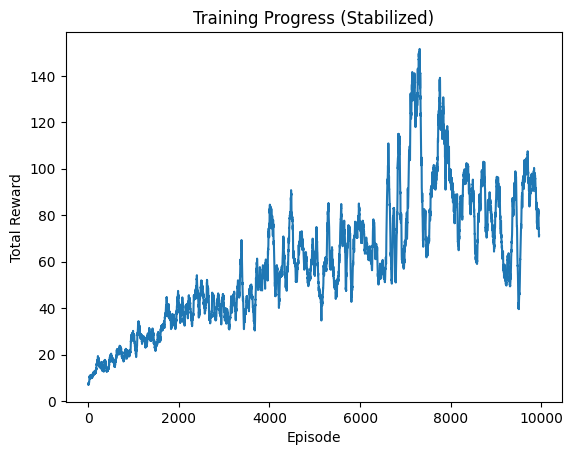

In [40]:
# Smooth rewards for better visualization
smoothed_rewards = np.convolve(rewards, np.ones(50)/50, mode='valid')

# Plot the rewards
plt.plot(smoothed_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Progress (Stabilized)")
plt.show()